In [1]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.font_manager import FontProperties
from sklearn import manifold
from sklearn.cluster import KMeans
from sqlalchemy import create_engine
from sqlalchemy.ext.automap import automap_base

myfont = FontProperties(fname= '微软正黑体.ttf')
%matplotlib inline

In [2]:
engine = create_engine('sqlite:///tw50.db')

In [3]:
data0 = pd.read_sql('select price_adjustment from price where (id = "2382 廣達" or id = "4904 遠傳" or id = "3045 台灣大") and date = "2006-01-06" ORDER BY date ASC',engine)

In [4]:
data0 = data0.describe().T

In [5]:
data1 = pd.read_sql('select price_adjustment from price where (id = "2382 廣達" or id = "4904 遠傳" or id = "3045 台灣大") and date = "2006-12-29" ORDER BY date ASC',engine)

In [6]:
data1 = data1.describe().T

In [7]:
data1 = (data1-data0)/data0

In [8]:
data00 = pd.read_sql('select price_adjustment from price where id = "0050 元大台灣50" and date = "2006-01-06"',engine)

In [9]:
data00

,price_adjustment
0,33.24


In [10]:
data01 = pd.read_sql('select price_adjustment from price where id = "0050 元大台灣50" and date = "2006-12-29"',engine)

In [11]:
data01

,price_adjustment
0,39.45


In [12]:
data1 = (data01-data00)/data00

In [13]:
data1['price_adjustment']

0    0.186823
Name: price_adjustment, dtype: float64

In [14]:
data1['price_adjustment'].values/data0['mean'].values

array([0.00927622])

In [15]:
target = ["2382 廣達","4904 遠傳","3045 台灣大"]

In [16]:
year = '2006'
remuneration0 = []
remuneration1 = []

for i in range(6):
    temp = year+'-01-01'
    data0 = pd.read_sql('select * from price where (id = "2382 廣達" or id = "4904 遠傳" or id = "3045 台灣大" or id = "2408 南亞科") and date > ? ORDER BY date ASC LIMIT 3',con=engine,index_col='id',params=[temp])
    data00 = pd.read_sql('select * from price where id = "0050 元大台灣50" and date > ? ORDER BY date ASC LIMIT 1',con=engine,index_col='id',params=[temp])
#     print(data00)
    temp = year+'-12-31'
    data1 = pd.read_sql('select * from price where (id = "2382 廣達" or id = "4904 遠傳" or id = "3045 台灣大" or id = "2408 南亞科") and date < ? ORDER BY date DESC LIMIT 3',con=engine,index_col='id',params=[temp])
    data01 = pd.read_sql('select * from price where id = "0050 元大台灣50" and date < ? ORDER BY date DESC LIMIT 1',con=engine,index_col='id',params=[temp])
#     print(data01)
    temp = (data1['price_adjustment'] - data0['price_adjustment'])/data0['price_adjustment']
    remuneration0.append(temp.describe()['mean']*100)
    temp = (data01['price_adjustment'] - data00['price_adjustment'])/data00['price_adjustment']
    remuneration1.append(temp.values[0]*100)
    year = str(int(year)+1)

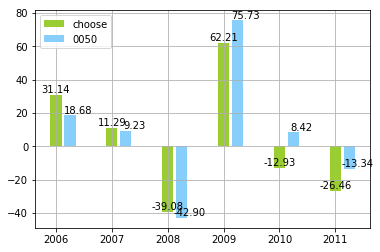

In [17]:
index = [2006,2007,2008,2009,2010,2011]
index = np.asarray(index)
plt.bar(index,remuneration0,.2,facecolor = 'yellowgreen', label='choose')
plt.bar(index+0.25,remuneration1,.2,facecolor = 'lightskyblue', label='0050')
for x,y in zip(index,remuneration0):
    plt.text(x, y+0.08, '%.2f' % y, ha='center', va= 'bottom')
for x,y in zip(index,remuneration1):
    plt.text(x+0.4, y+0.05, '%.2f' % y, ha='center', va= 'bottom')
plt.grid(True)
plt.legend(loc="upper left")
plt.show()

In [18]:
year = '2006'
remuneration0 = []
remuneration1 = []

for i in range(6):
    temp = year+'-01-01'
    data0 = pd.read_sql('select * from price where (id = "2382 廣達" or id = "3045 台灣大" or id = "2408 南亞科") and date > ? ORDER BY date ASC LIMIT 3',con=engine,index_col='id',params=[temp])
    data00 = pd.read_sql('select * from price where id = "0050 元大台灣50" and date > ? ORDER BY date ASC LIMIT 1',con=engine,index_col='id',params=[temp])
#     print(data00)
    temp = year+'-12-31'
    data1 = pd.read_sql('select * from price where (id = "2382 廣達" or id = "3045 台灣大" or id = "2408 南亞科") and date < ? ORDER BY date DESC LIMIT 3',con=engine,index_col='id',params=[temp])
    data01 = pd.read_sql('select * from price where id = "0050 元大台灣50" and date < ? ORDER BY date DESC LIMIT 1',con=engine,index_col='id',params=[temp])
#     print(data01)
    temp = (data1['price_adjustment'] - data0['price_adjustment'])/data0['price_adjustment']
    remuneration0.append(temp.describe()['mean']*100)
    temp = (data01['price_adjustment'] - data00['price_adjustment'])/data00['price_adjustment']
    remuneration1.append(temp.values[0]*100)
    year = str(int(year)+1)

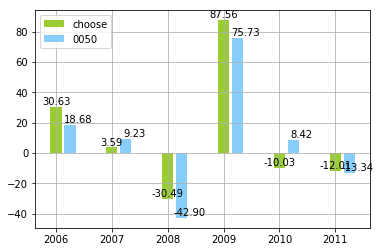

In [19]:
index = [2006,2007,2008,2009,2010,2011]
index = np.asarray(index)
plt.bar(index,remuneration0,.2,facecolor = 'yellowgreen', label='choose')
plt.bar(index+0.25,remuneration1,.2,facecolor = 'lightskyblue', label='0050')
for x,y in zip(index,remuneration0):
    plt.text(x, y+0.08, '%.2f' % y, ha='center', va= 'bottom')
for x,y in zip(index,remuneration1):
    plt.text(x+0.4, y+0.05, '%.2f' % y, ha='center', va= 'bottom')
plt.grid(True)
plt.legend(loc="upper left")
plt.show()

In [20]:
year = '2006'
remuneration0 = []
remuneration1 = []

for i in range(6):
    temp = year+'-01-01'
    data0 = pd.read_sql('select * from price where (id = "2382 廣達" or id = "4904 遠傳" or id = "2408 南亞科") and date > ? ORDER BY date ASC LIMIT 3',con=engine,index_col='id',params=[temp])
    data00 = pd.read_sql('select * from price where id = "0050 元大台灣50" and date > ? ORDER BY date ASC LIMIT 1',con=engine,index_col='id',params=[temp])
#     print(data00)
    temp = year+'-12-31'
    data1 = pd.read_sql('select * from price where (id = "2382 廣達" or id = "4904 遠傳" or id = "2408 南亞科") and date < ? ORDER BY date DESC LIMIT 3',con=engine,index_col='id',params=[temp])
    data01 = pd.read_sql('select * from price where id = "0050 元大台灣50" and date < ? ORDER BY date DESC LIMIT 1',con=engine,index_col='id',params=[temp])
#     print(data01)
    temp = (data1['price_adjustment'] - data0['price_adjustment'])/data0['price_adjustment']
    remuneration0.append(temp.describe()['mean']*100)
    temp = (data01['price_adjustment'] - data00['price_adjustment'])/data00['price_adjustment']
    remuneration1.append(temp.values[0]*100)
    year = str(int(year)+1)

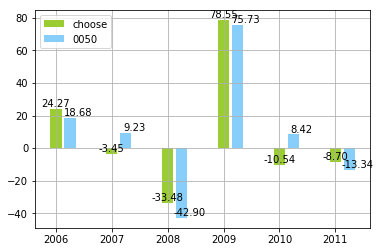

In [21]:
index = [2006,2007,2008,2009,2010,2011]
index = np.asarray(index)
plt.bar(index,remuneration0,.2,facecolor = 'yellowgreen', label='choose')
plt.bar(index+0.25,remuneration1,.2,facecolor = 'lightskyblue', label='0050')
for x,y in zip(index,remuneration0):
    plt.text(x, y+0.08, '%.2f' % y, ha='center', va= 'bottom')
for x,y in zip(index,remuneration1):
    plt.text(x+0.4, y+0.05, '%.2f' % y, ha='center', va= 'bottom')
plt.grid(True)
plt.legend(loc="upper left")
plt.show()

In [22]:
year = '2006'
remuneration0 = []
remuneration1 = []

for i in range(6):
    temp = year+'-01-01'
    data0 = pd.read_sql('select * from price where (id = "2382 廣達" or id = "4904 遠傳" or id = "3045 台灣大") and date > ? ORDER BY date ASC LIMIT 3',con=engine,index_col='id',params=[temp])
    data00 = pd.read_sql('select * from price where id = "0050 元大台灣50" and date > ? ORDER BY date ASC LIMIT 1',con=engine,index_col='id',params=[temp])
#     print(data00)
    temp = year+'-12-31'
    data1 = pd.read_sql('select * from price where (id = "2382 廣達" or id = "4904 遠傳" or id = "3045 台灣大") and date < ? ORDER BY date DESC LIMIT 3',con=engine,index_col='id',params=[temp])
    data01 = pd.read_sql('select * from price where id = "0050 元大台灣50" and date < ? ORDER BY date DESC LIMIT 1',con=engine,index_col='id',params=[temp])
#     print(data01)
    temp = (data1['price_adjustment'] - data0['price_adjustment'])/data0['price_adjustment']
    remuneration0.append(temp.describe()['mean']*100)
    temp = (data01['price_adjustment'] - data00['price_adjustment'])/data00['price_adjustment']
    remuneration1.append(temp.values[0]*100)
    year = str(int(year)+1)

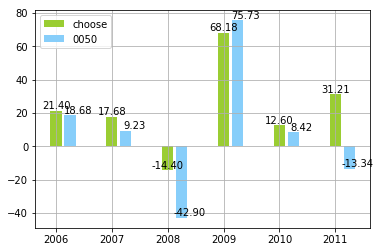

In [23]:
index = [2006,2007,2008,2009,2010,2011]
index = np.asarray(index)
plt.bar(index,remuneration0,.2,facecolor = 'yellowgreen', label='choose')
plt.bar(index+0.25,remuneration1,.2,facecolor = 'lightskyblue', label='0050')
for x,y in zip(index,remuneration0):
    plt.text(x, y+0.08, '%.2f' % y, ha='center', va= 'bottom')
for x,y in zip(index,remuneration1):
    plt.text(x+0.4, y+0.05, '%.2f' % y, ha='center', va= 'bottom')
plt.grid(True)
plt.legend(loc="upper left")
plt.show()